<a href="https://colab.research.google.com/github/vasudevanmk/M-L-A-Z/blob/main/Breast_Cancer_logistic_regressio_using_Kernal_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z /Part 3 - Classification/Section 14 - Logistic Regression/Python/breast-cancer-wisconsin.data')
#X = dataset.iloc[:, 1:-1].values
#y = dataset.iloc[:, -1].values

In [5]:
dataset.describe()

,1000025,5,1,1.1,1.2,2,3,1.4,1.5,2.1
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
dataset = dataset.replace('?', np.nan)  # Replace '?' with NaN values
dataset = dataset.dropna()  #

In [7]:
dataset.describe()

,1000025,5,1,1.1,1.2,2,3,1.4,1.5,2.1
count,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,1.076833e+06,4.441349,3.153959,3.218475,2.832845,3.236070,3.445748,2.872434,1.604106,2.700880
std,6.210926e+05,2.822751,3.066285,2.989568,2.865805,2.224214,2.451435,3.054065,1.733792,0.954916
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.774540e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171820e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238741e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [9]:
print(dataset,X,y)

     1000025  5   1  1.1  1.2  2 1.3   3  1.4  1.5  2.1
0    1002945  5   4    4    5  7  10   3    2    1    2
1    1015425  3   1    1    1  2   2   3    1    1    2
2    1016277  6   8    8    1  3   4   3    7    1    2
3    1017023  4   1    1    3  2   1   3    1    1    2
4    1017122  8  10   10    8  7  10   9    7    1    4
..       ... ..  ..  ...  ... ..  ..  ..  ...  ...  ...
693   776715  3   1    1    1  3   2   1    1    1    2
694   841769  2   1    1    1  2   1   1    1    1    2
695   888820  5  10   10    3  7   3   8   10    2    4
696   897471  4   8    6    4  3   4  10    6    1    4
697   897471  4   8    8    5  4   5  10    4    1    4

[682 rows x 11 columns] [[5 4 4 ... 3 2 1]
 [3 1 1 ... 3 1 1]
 [6 8 8 ... 3 7 1]
 ...
 [5 10 10 ... 8 10 2]
 [4 8 6 ... 10 6 1]
 [4 8 8 ... 10 4 1]] [2 2 2 2 4 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 2 4 2 4
 4 4 4 4 4 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 2 4 4 2 2 4 2 4 4 2 2
 2 2 2 2 2 2 2 4 4 4 4 2 2 2

In [10]:
print(X[0:5,:],y[0:5])

[[5 4 4 5 7 '10' 3 2 1]
 [3 1 1 1 2 '2' 3 1 1]
 [6 8 8 1 3 '4' 3 7 1]
 [4 1 1 3 2 '1' 3 1 1]
 [8 10 10 8 7 '10' 9 7 1]] [2 2 2 2 4]


## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
print(X_train)

[[3 1 1 ... 2 1 1]
 [1 1 1 ... 3 2 1]
 [5 1 1 ... 2 2 1]
 ...
 [3 1 1 ... 2 1 1]
 [1 2 2 ... 1 1 1]
 [5 1 2 ... 3 1 1]]


In [13]:
print(y_train)

[2 2 2 4 2 2 2 2 2 4 2 2 4 2 2 4 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 4 4 2 4 4 2
 4 2 4 2 2 4 4 2 4 4 2 2 4 2 4 2 2 2 2 4 4 4 2 2 2 4 2 4 4 2 4 2 2 2 4 4 4
 2 4 2 2 4 4 2 2 4 4 2 2 2 2 4 2 4 4 2 2 2 4 2 2 4 4 2 2 4 4 2 2 4 2 2 2 2
 2 2 2 2 2 2 4 2 2 4 2 4 2 2 2 4 4 2 2 2 2 2 4 2 2 2 2 2 2 2 4 4 4 4 2 4 2
 2 2 2 4 4 2 2 4 4 2 4 2 2 4 4 2 2 2 2 2 2 2 2 4 2 4 2 2 2 2 4 2 4 2 2 4 4
 4 2 4 4 4 2 4 2 4 2 4 2 4 2 4 2 2 2 2 2 4 4 2 2 2 2 4 2 2 2 4 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 2 2 2 2 2 2 4 2 2 2 2 4 2 4 4 2 4 2 2 2 4 2 2 2 4 2 2 4 4
 4 2 2 4 2 4 2 2 2 2 2 2 2 2 4 4 4 2 2 4 4 4 2 4 2 4 2 2 4 2 4 2 2 4 2 2 2
 2 2 4 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 4 2 2 2 2 2 4 2 2 2 4 2 2 2 2
 2 4 2 2 2 4 4 4 4 4 2 2 4 2 2 4 4 2 2 2 2 4 4 2 2 4 4 2 4 2 2 2 4 2 2 4 4
 4 2 2 2 2 4 2 2 2 2 2 2 2 4 2 4 2 4 2 2 4 4 2 2 2 4 2 2 4 4 2 2 4 2 2 2 2
 2 4 4 2 4 2 4 4 2 2 2 4 4 4 2 2 4 2 4 2 2 2 2 2 4 2 4 2 2 4 2 2 2 2 2 2 2
 2 4 2 4 4 4 4 4 2 4 2 4 2 4 4 4 4 4 4 2 2 2 2 2 4 2 2 4 2 2 2 4 2 2 2 4 2
 2 2 2 2 2 4 4 2 2 2 2 2 

In [14]:
X_test

array([[8, 3, 3, ..., 3, 2, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [6, 8, 7, ..., 8, 9, 1],
       ...,
       [5, 2, 2, ..., 2, 2, 1],
       [4, 1, 1, ..., 2, 1, 1],
       [1, 1, 1, ..., 3, 1, 1]], dtype=object)

In [15]:
print(y_test)

[2 2 4 2 2 4 2 2 2 4 4 2 4 2 2 4 4 4 2 4 4 2 2 2 4 2 2 2 2 2 2 2 4 2 2 2 2
 4 2 2 2 2 2 4 2 2 4 4 2 4 2 2 4 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 4 4 2 2 2 2
 2 4 4 2 2 4 2 2 4 2 2 4 2 2 4 2 2 2 2 4 4 4 2 4 4 2 2 4 4 4 4 2 2 4 2 2 2
 2 2 4 2 2 2 4 2 2 2 4 2 4 4 4 2 2 2 4 2 2 2 2 4 2 2 2 2 4 2 4 4 4 2 4 4 2
 4 2 4 4 4 4 2 2 2 2 2 4 2 4 2 2 2 2 2 4 2 2 2]


## Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

## Training the Logistic Regression model on the Training set

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [ ]:
#print(classifier.predict([[5, 2, 2,1,2,1, 2, 2, 1]]))

[4]


## Predicting the Test set results

In [19]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]

## Making the Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[108   4]
 [  1  58]]


0.9707602339181286

## K-Fold Validation


In [21]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train,y=y_train, cv =10)
print("Accuracy:{:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation:{:.2f} %".format(accuracies.std()*100))

Accuracy:96.28 %
Standard Deviation:2.05 %


## Visualising the Training set results

<ipython-input-24-dcbaaf9cb35d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


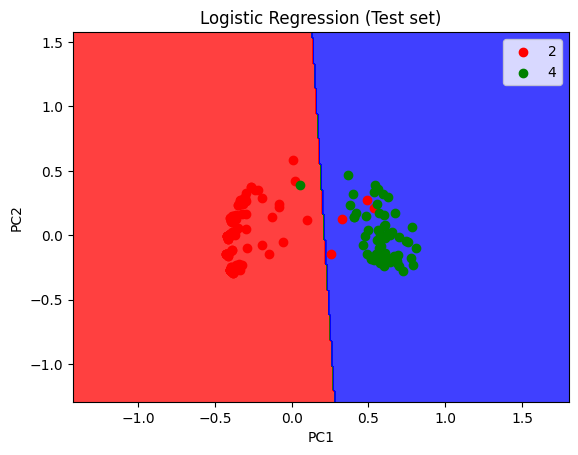

In [24]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Visualising the Test set results

<ipython-input-25-dcbaaf9cb35d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


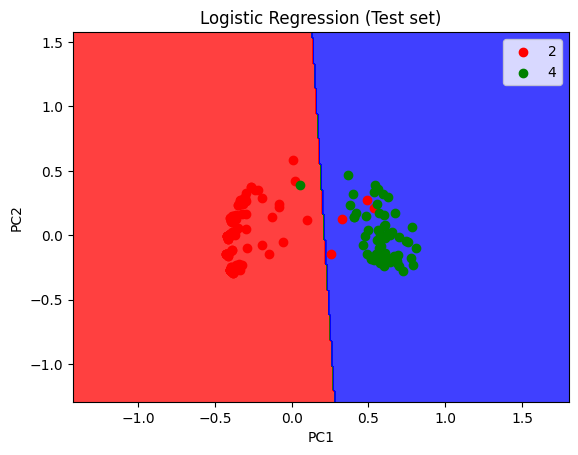

In [25]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()